PROJECT TEAM: HUA YANG, JENNY LAM, OLIVIA MALAGON

In [124]:
import pyspark.pandas as ps
import matplotlib.pyplot as plt
ps.set_option('plotting.backend', 'matplotlib')

#Load dataset and drop "id"column
#based on our another file already explore descriptive statistics
#we will drop 'id', 'country' for future build model
df = 's3://gba6430-huayang-01/intro/lung_cancer_data.csv'
df = ps.read_csv(df)
df = df.rename(columns={'Unnamed: 0': 'id'})
df = df.drop(columns=['id', 'country'])
df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   _c0   age  gender diagnosis_date cancer_stage beginning_of_treatment_date family_history  smoking_status   bmi  cholesterol_level  hypertension  asthma  cirrhosis  other_cancer treatment_type end_treatment_date  survived
0    1  50.0    Male     2023-04-22    Stage III                  2023-05-02            Yes  Passive Smoker  25.9                208             1       0          0             0      Radiation         2024-04-25         0
1    2  65.0    Male     2023-04-07     Stage IV                  2023-04-12             No    Never Smoked  18.9                193             0       0          0             0        Surgery         2025-03-11         0
2    3  51.0  Female     2016-02-07    Stage III                  2016-02-13            Yes   Former Smoker  34.6                249             1       1          1             0        Surgery         2017-04-14         1
3    4  37.0    Male     2023-12-01      Stage I                  2023-12-03            Yes    Never Smo

In [125]:
#check shape
df.shape

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(10000, 17)

In [126]:
#check data info
df.info()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _c0                          10000 non-null  int32  
 1   age                          10000 non-null  float64
 2   gender                       10000 non-null  object 
 3   diagnosis_date               10000 non-null  object 
 4   cancer_stage                 10000 non-null  object 
 5   beginning_of_treatment_date  10000 non-null  object 
 6   family_history               10000 non-null  object 
 7   smoking_status               10000 non-null  object 
 8   bmi                          10000 non-null  float64
 9   cholesterol_level            10000 non-null  int32  
 10  hypertension                 10000 non-null  int32  
 11  asthma                       10000 non-null  int32  
 12  cirrhosis                    10000 non-null  int32  
 13  other_cancer  

In [127]:
%%pretty
df.to_spark().show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

_c0,age,gender,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
1,50.0,Male,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
2,65.0,Male,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
3,51.0,Female,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
4,37.0,Male,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0
5,50.0,Male,2023-01-04,Stage II,2023-01-12,Yes,Never Smoked,32.6,300,1,1,0,0,Radiation,2024-03-11,0
6,49.0,Male,2018-05-23,Stage IV,2018-05-30,No,Former Smoker,30.1,300,1,1,0,1,Chemotherapy,2019-07-07,0
7,51.0,Female,2017-02-20,Stage II,2017-02-23,Yes,Former Smoker,44.3,244,1,0,0,0,Combined,2018-10-09,0
8,64.0,Female,2021-03-23,Stage I,2021-04-03,Yes,Passive Smoker,26.9,161,1,0,0,0,Surgery,2023-02-13,0
9,56.0,Male,2021-12-02,Stage III,2021-12-04,Yes,Passive Smoker,40.9,286,1,1,0,0,Chemotherapy,2023-07-07,1
10,48.0,Female,2023-12-26,Stage II,2024-01-08,Yes,Passive Smoker,16.2,223,1,1,1,0,Surgery,2025-08-20,0


In [128]:
#defien a function to plot histogram of numeric features
def plot_hist(df, features, n_rows, n_cols):
    fig, ax = plt.subplots(n_rows, n_cols)
    fig.tight_layout(pad=1.5)
    for i in range(len(features)):
        df[features[i]].hist(ax=ax[i//n_cols, i%n_cols], title=features[i])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

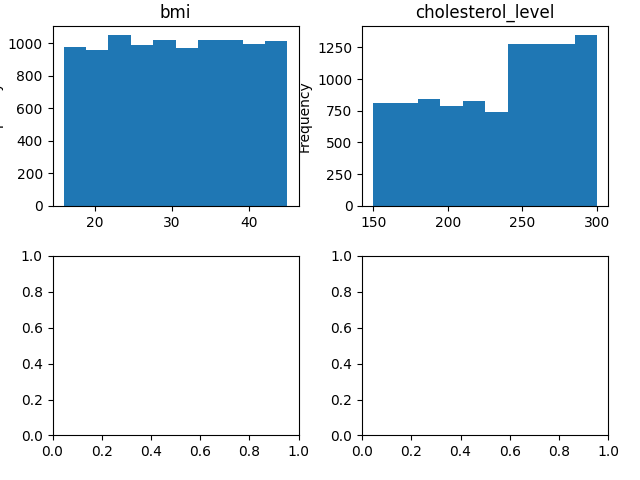

In [129]:
#use histgram plot explore "bmi", "cholesterol_level" numberical columns
features = ["bmi", "cholesterol_level"]
plot_hist(df, features=features, n_rows=2, n_cols=2)
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

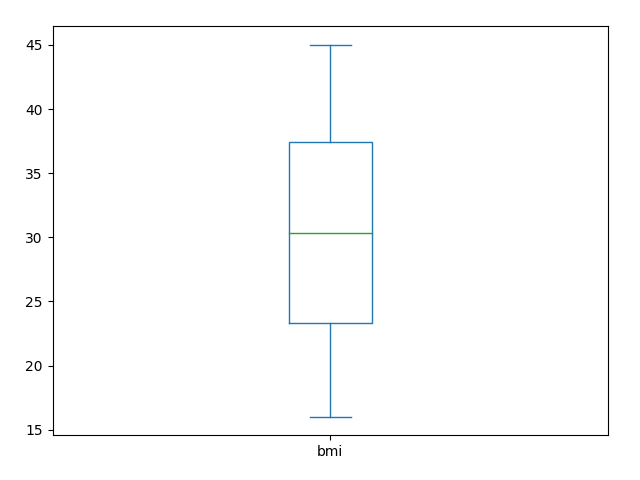

In [130]:
#use boxplot explore "bmi" outlier, the result shows no outlier
plt.clf()
df['bmi'].plot.box()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

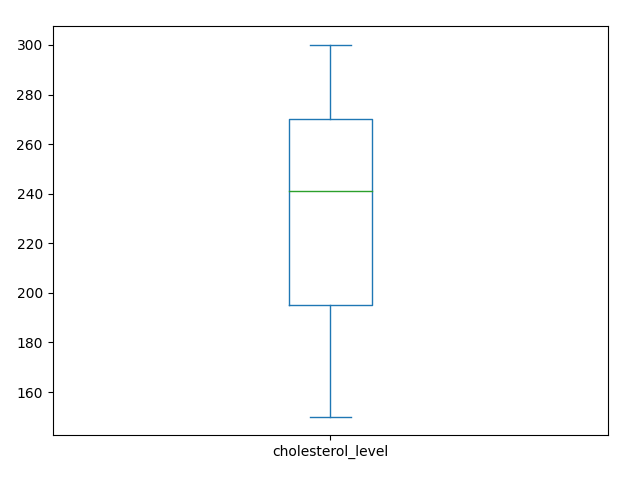

In [131]:
#use boxplot explore "cholesterol_level" outlier, the result shows no outlier
plt.clf()
df["cholesterol_level"].plot.box()
%matplot plt

In [132]:
#change categarical variable as dummies
df = ps.get_dummies(df, columns=["gender","cancer_stage","family_history","smoking_status","treatment_type"], drop_first=False)
df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   _c0   age diagnosis_date beginning_of_treatment_date   bmi  cholesterol_level  hypertension  asthma  cirrhosis  other_cancer end_treatment_date  survived  gender_Female  gender_Male  cancer_stage_Stage I  cancer_stage_Stage II  cancer_stage_Stage III  cancer_stage_Stage IV  family_history_No  family_history_Yes  smoking_status_Current Smoker  smoking_status_Former Smoker  smoking_status_Never Smoked  smoking_status_Passive Smoker  treatment_type_Chemotherapy  treatment_type_Combined  treatment_type_Radiation  treatment_type_Surgery
0    1  50.0     2023-04-22                  2023-05-02  25.9                208             1       0          0             0         2024-04-25         0              0            1                     0                      0                       1                      0                  0                   1                              0                             0                            0                              1                       

In [133]:
%%pretty
df.to_spark().show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

_c0,age,diagnosis_date,beginning_of_treatment_date,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,end_treatment_date,survived,gender_Female,gender_Male,cancer_stage_Stage I,cancer_stage_Stage II,cancer_stage_Stage III,cancer_stage_Stage IV,family_history_No,family_history_Yes,smoking_status_Current Smoker,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Chemotherapy,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
1,50.0,2023-04-22,2023-05-02,25.9,208,1,0,0,0,2024-04-25,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,65.0,2023-04-07,2023-04-12,18.9,193,0,0,0,0,2025-03-11,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1
3,51.0,2016-02-07,2016-02-13,34.6,249,1,1,1,0,2017-04-14,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
4,37.0,2023-12-01,2023-12-03,40.2,262,0,0,0,0,2024-09-20,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0
5,50.0,2023-01-04,2023-01-12,32.6,300,1,1,0,0,2024-03-11,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
6,49.0,2018-05-23,2018-05-30,30.1,300,1,1,0,1,2019-07-07,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0
7,51.0,2017-02-20,2017-02-23,44.3,244,1,0,0,0,2018-10-09,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
8,64.0,2021-03-23,2021-04-03,26.9,161,1,0,0,0,2023-02-13,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
9,56.0,2021-12-02,2021-12-04,40.9,286,1,1,0,0,2023-07-07,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
10,48.0,2023-12-26,2024-01-08,16.2,223,1,1,1,0,2025-08-20,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1


In [134]:
#check again, make sure dataset shape is 10000
df.shape

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(10000, 28)

In [135]:
#ps to pd
import pandas as pd
df = df.to_pandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

/mnt/yarn/usercache/livy/appcache/application_1719888885730_0001/container_1719888885730_0001_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)

In [136]:
import pandas as pd
df['beginning_of_treatment_date'] = pd.to_datetime(df['beginning_of_treatment_date'])
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])
df['duration'] = (df['end_treatment_date'] - df['beginning_of_treatment_date']).dt.days

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [137]:
#drop 'diagnosis_date','beginning_of_treatment_date','end_treatment_date' column
df = df.drop(columns=['diagnosis_date','beginning_of_treatment_date','end_treatment_date'])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [138]:
#panda to pyspark.pandas
df = ps.from_pandas(df)
df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   _c0   age   bmi  cholesterol_level  hypertension  asthma  cirrhosis  other_cancer  survived  gender_Female  gender_Male  cancer_stage_Stage I  cancer_stage_Stage II  cancer_stage_Stage III  cancer_stage_Stage IV  family_history_No  family_history_Yes  smoking_status_Current Smoker  smoking_status_Former Smoker  smoking_status_Never Smoked  smoking_status_Passive Smoker  treatment_type_Chemotherapy  treatment_type_Combined  treatment_type_Radiation  treatment_type_Surgery  duration
0    1  50.0  25.9                208             1       0          0             0         0              0            1                     0                      0                       1                      0                  0                   1                              0                             0                            0                              1                            0                        0                         1                       0       359
1    2  65.0  18.9    

In [139]:
%%pretty
df.to_spark().show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

_c0,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,gender_Female,gender_Male,cancer_stage_Stage I,cancer_stage_Stage II,cancer_stage_Stage III,cancer_stage_Stage IV,family_history_No,family_history_Yes,smoking_status_Current Smoker,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Chemotherapy,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery,duration
1,50.0,25.9,208,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,359
2,65.0,18.9,193,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,699
3,51.0,34.6,249,1,1,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,426
4,37.0,40.2,262,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,292
5,50.0,32.6,300,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,424
6,49.0,30.1,300,1,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,403
7,51.0,44.3,244,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,593
8,64.0,26.9,161,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,681
9,56.0,40.9,286,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,580
10,48.0,16.2,223,1,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,590


In [140]:
#check shape again
df.shape

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(10000, 26)